<a href="https://colab.research.google.com/github/VaibhavKumar2005/AI-ML-Journey-Repo-/blob/main/KrishNaikMLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**



In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
housing = fetch_california_housing()

In [5]:
df = fetch_california_housing()

In [6]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
pd.DataFrame(df.data)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names

In [9]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
#Independent and dependent features
X = dataset
y = df.target

In [11]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)


In [13]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12018,4.5500,28.0,6.037356,0.968391,1061.0,3.048851,33.92,-117.50
4731,2.7917,49.0,5.128866,0.948454,462.0,2.381443,34.04,-118.36
5465,2.5523,46.0,3.761017,1.162712,1107.0,1.876271,33.99,-118.48
14382,2.8007,40.0,4.244660,1.066019,953.0,1.850485,32.74,-117.25
9320,2.5125,52.0,3.723150,1.076372,700.0,1.670644,37.97,-122.53
...,...,...,...,...,...,...,...,...
153,4.7708,52.0,6.727700,1.075117,612.0,2.873239,37.81,-122.23
866,5.2879,12.0,5.410596,1.006623,3436.0,3.250710,37.57,-122.04
74,2.4830,20.0,6.278195,1.210526,290.0,2.180451,37.81,-122.29
14512,6.0891,5.0,5.469595,0.918919,1063.0,3.591216,32.91,-117.16


In [32]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
feature_names = X_train.columns

In [36]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)

In [37]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [29]:
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [25]:
mse = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [26]:
np.mean(mse)

np.float64(-0.5274884524837963)

In [40]:
#Predict Regression
reg_pred = regression.predict(X_test)

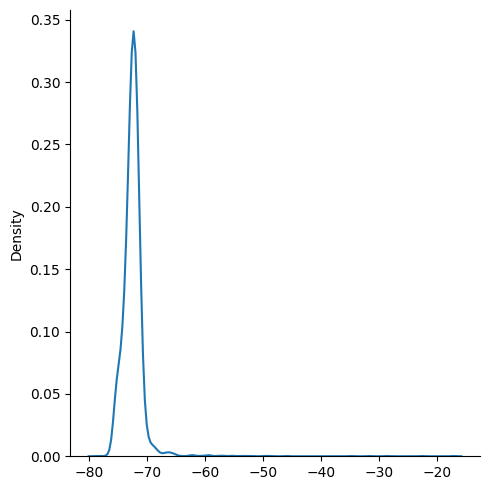

In [42]:
import seaborn as sns
sns.displot(reg_pred - y_test, kind = "kde")

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, reg_pred)

-3892.5426372387515

**Ridge Regression Algorithm**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor = Ridge()

In [ ]:
ridge_regressor

Ridge()